<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/Kaggle_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Use seaborn for the correlation heatmap
!pip install seaborn

In [0]:
import warnings
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Time related libraries
import time

In [0]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving covid19-global-forecasting-week-1.zip to covid19-global-forecasting-week-1.zip


In [0]:
#Unzipping if needed
!unzip covid19-global-forecasting-week-1.zip

Archive:  covid19-global-forecasting-week-1.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [0]:
#read file & check the upload
df = pd.read_csv('train.csv')
df_filtered = df.loc[df['ConfirmedCases'] != 0]
df_filtered.head(40)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
33,34,NaN,Afghanistan,33.0000,65.0000,2020-02-24,1.0,0.0
34,35,NaN,Afghanistan,33.0000,65.0000,2020-02-25,1.0,0.0
35,36,NaN,Afghanistan,33.0000,65.0000,2020-02-26,1.0,0.0
36,37,NaN,Afghanistan,33.0000,65.0000,2020-02-27,1.0,0.0
37,38,NaN,Afghanistan,33.0000,65.0000,2020-02-28,1.0,0.0
38,39,NaN,Afghanistan,33.0000,65.0000,2020-02-29,1.0,0.0
39,40,NaN,Afghanistan,33.0000,65.0000,2020-03-01,1.0,0.0
40,41,NaN,Afghanistan,33.0000,65.0000,2020-03-02,1.0,0.0
41,42,NaN,Afghanistan,33.0000,65.0000,2020-03-03,1.0,0.0
42,43,NaN,Afghanistan,33.0000,65.0000,2020-03-04,1.0,0.0


In [0]:
data_shape = df.shape
print(data_shape)

(16188, 8)


In [0]:
#data cleaning & exploration
unknown_count = df.isna().sum().drop_duplicates()
unknown_count[unknown_count>0]

Province/State    8778
dtype: int64

In [0]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guadeloupe',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia

In [0]:
df_US = df[df['Country/Region']=='US']
df_US.head(30)

In [0]:
df_US_filtered = df_US.loc[df['ConfirmedCases'] != 0]
df_US_filtered.head(30)

In [0]:
df_China = df[df['Country/Region']=='China']
df_China.head(30)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
2679,4372,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0
2680,4373,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0
2681,4374,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0
2682,4375,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0
2683,4376,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0
2684,4377,Anhui,China,31.8257,117.2264,2020-01-27,70.0,0.0
2685,4378,Anhui,China,31.8257,117.2264,2020-01-28,106.0,0.0
2686,4379,Anhui,China,31.8257,117.2264,2020-01-29,152.0,0.0
2687,4380,Anhui,China,31.8257,117.2264,2020-01-30,200.0,0.0
2688,4381,Anhui,China,31.8257,117.2264,2020-01-31,237.0,0.0


In [0]:
df_China['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object)

In [0]:
df_Hubei = df[df['Province/State']=='Hubei']
df_Hubei.head(30)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
3420,5581,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0
3421,5582,Hubei,China,30.9756,112.2707,2020-01-23,444.0,17.0
3422,5583,Hubei,China,30.9756,112.2707,2020-01-24,549.0,24.0
3423,5584,Hubei,China,30.9756,112.2707,2020-01-25,761.0,40.0
3424,5585,Hubei,China,30.9756,112.2707,2020-01-26,1058.0,52.0
3425,5586,Hubei,China,30.9756,112.2707,2020-01-27,1423.0,76.0
3426,5587,Hubei,China,30.9756,112.2707,2020-01-28,3554.0,125.0
3427,5588,Hubei,China,30.9756,112.2707,2020-01-29,3554.0,125.0
3428,5589,Hubei,China,30.9756,112.2707,2020-01-30,4903.0,162.0
3429,5590,Hubei,China,30.9756,112.2707,2020-01-31,5806.0,204.0


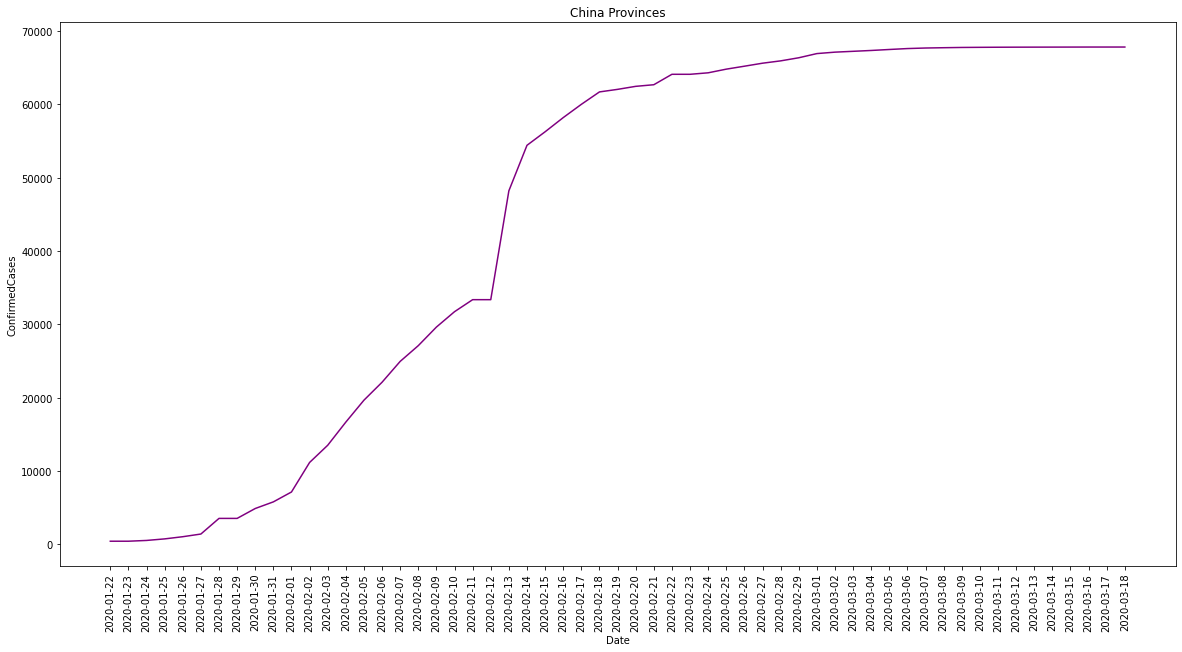

In [0]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_Hubei['Date'],
        df_Hubei['ConfirmedCases'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="China Provinces")
plt.xticks(rotation=90)
plt.show()

In [0]:
df_Italy = df[df['Country/Region']=='Italy']
df_Italy.head(30)

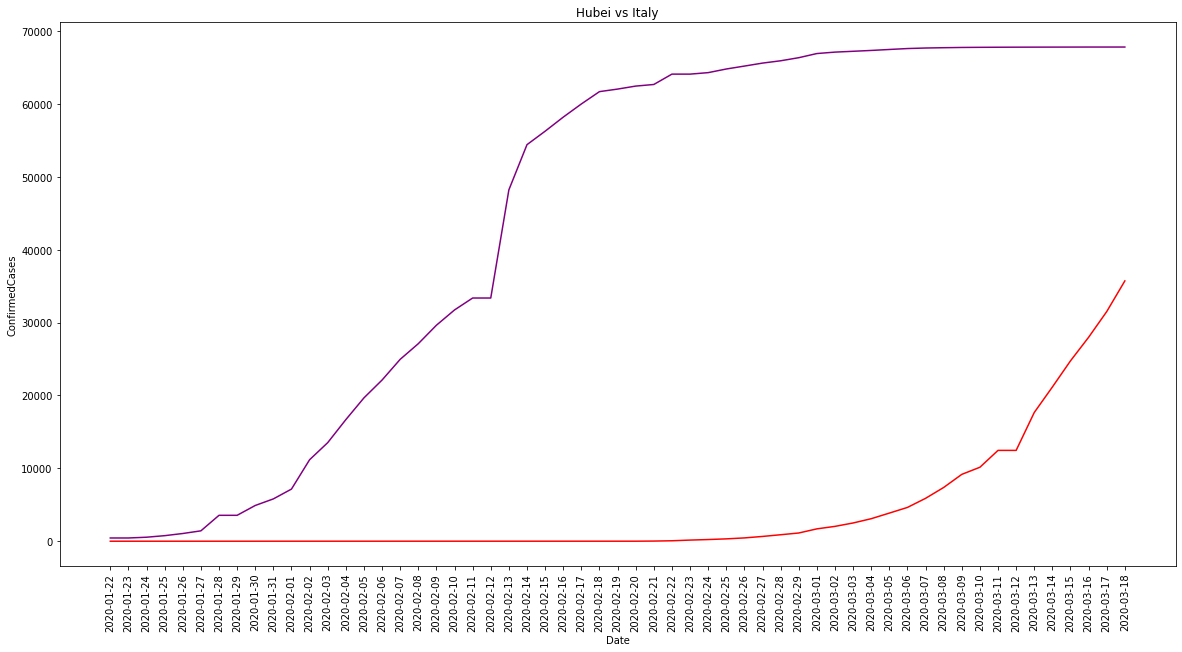

In [0]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_Italy['Date'],
        df_Italy['ConfirmedCases'],
        color='red')
ax.plot(df_Italy['Date'],
        df_Hubei['ConfirmedCases'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Hubei vs Italy")
plt.xticks(rotation=90)
plt.show()

In [0]:
start_max_Italy = df_Italy.loc[df_Italy['Date'] == '2020-03-12', 'ConfirmedCases'].values[0]
finish_max_Italy = df_Italy.loc[df_Italy['Date'] == '2020-03-18', 'ConfirmedCases'].values[0]
slope_max_italy = (finish_max_Italy-start_max_Italy)/6
print(slope_max_italy)
start_max_Hubei = df_Hubei.loc[df_Hubei['Date'] == '2020-02-12', 'ConfirmedCases'].values[0]
finish_max_Hubei = df_Hubei.loc[df_Hubei['Date'] == '2020-02-15', 'ConfirmedCases'].values[0]
slope_max_Hubei = (finish_max_Hubei-start_max_Hubei)/2
print(slope_max_Hubei)

3875.1666666666665
11441.5


In [0]:
df_Korea_South = df[df['Country/Region']=='Korea, South']
df_Korea_South.head(30)

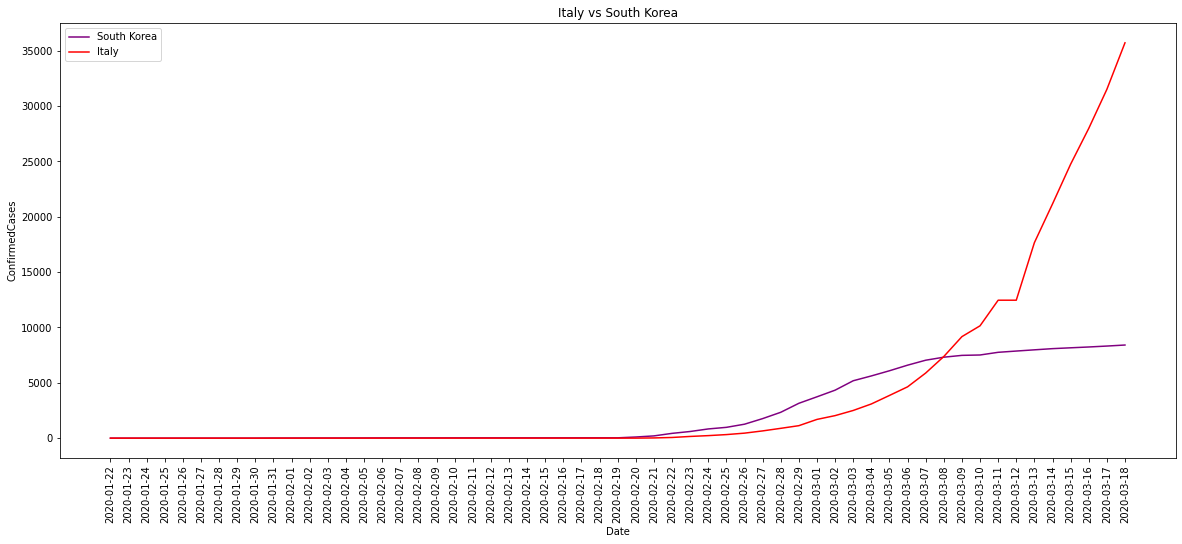

In [0]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))

# Add x-axis and y-axis
ax.plot(df_Korea_South['Date'],
        df_Korea_South['ConfirmedCases'],label = 'South Korea',
        color='purple')
ax.plot(df_Korea_South['Date'],
        df_Italy['ConfirmedCases'],label = 'Italy',
        color='red')


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases", 
       title="Italy vs South Korea")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [0]:
df_Japan = df[df['Country/Region']=='Japan']
df_Japan.head(30)

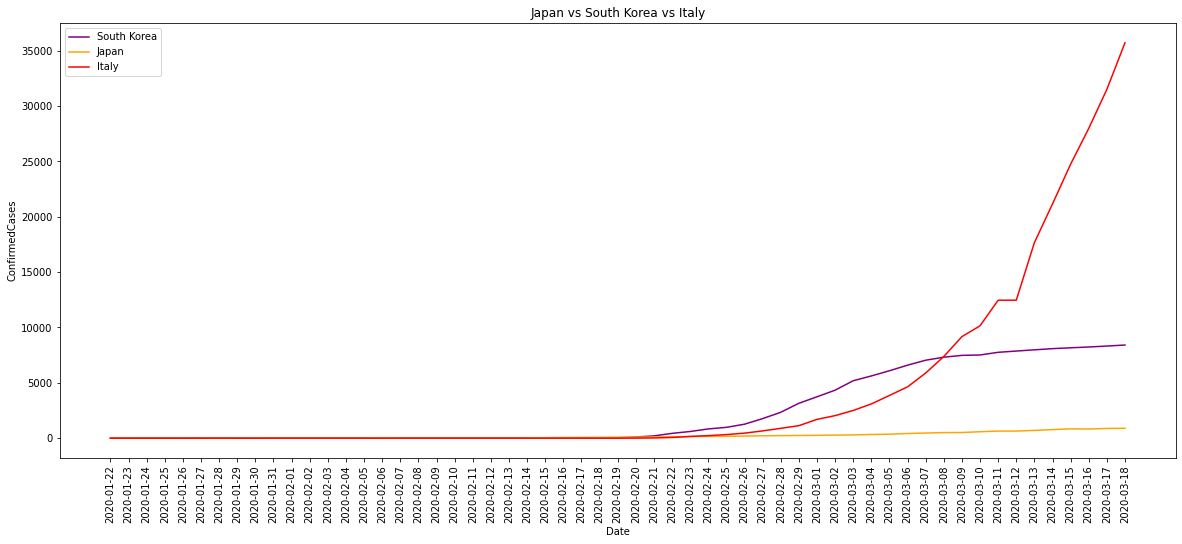

In [0]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))

# Add x-axis and y-axis
ax.plot(df_Korea_South['Date'],
        df_Korea_South['ConfirmedCases'],label = 'South Korea',
        color='purple')
ax.plot(df_Korea_South['Date'],
        df_Japan['ConfirmedCases'],label = 'Japan',
        color='orange')
ax.plot(df_Korea_South['Date'],
        df_Italy['ConfirmedCases'],label = 'Italy',
        color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases", 
       title="Japan vs South Korea vs Italy")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [0]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

In [0]:
#don't run!  just code snippets to work with
try:
    dateutil.parser.parse(value)
    print('date column is found')
    print('col {} - 1st value {}'.format(col, value))
    date_col = col
    search_mode = False
except:
  print('dateutilparser can not parse it')

# Creating a year column if date-time column is found - WORK IN PROGRESS
if date_col != 'not found':
  new_year_column = [] # new data column to add to th dataframe for aggregation by year
  new_month_column = [] # new data column to add to th dataframe for aggregation by month
  years_set = set() # years to plot against
  year_months_set = set() # a combination of yeasr and months to plot against
  for key, value in categories[date_col].iteritems():
    tmp=dateutil.parser.parse(value).year
    new_year_column.append(tmp)
    years_set.add(tmp)

# plotting time-series for the least correlated pairs of measurements currently tested for years only
x_axis = [] # plot X axis 
y1_values = [] # plot value set 1
y2_values = [] # plot value set 2
display_criterion = 0 # controls graph plotting & displaying 

if len(years_set) > 4:
  values_by_year_new = dict((el,[0,0]) for el in years_set)
  for pair in corr_ranking_smallest[:2]:

    print('printing first param to plot - {}'.format(pair[1]))
    print('printing second param to plot - {}'.format(pair[2]))

    for year in years_set:

      print('aggregating for year - {}'.format(year))

      param1_tmp = df_model1_with_years.loc[df_model1_with_years['year'] == year,pair[1]].sum()

      print('param1_tmp1===>{}'.format(param1_tmp))

      param2_tmp = df_model1_with_years.loc[df_model1_with_years['year'] == year,pair[2]].sum()
      values_by_year_new.update({year:[param1_tmp,param2_tmp]})

      print('values_by_year_new ===> {}'.format(values_by_year_new))

    for item in values_by_year_new.items():
      x_axis.append(item[0]) 
      y1_values.append(item[1][0])
      y2_values.append(item[1][1])     
    display_criterion = sum(y1_values)/sum(y2_values)
    if display_criterion > 100 or display_criterion <.01:

      print("timeseries {}-{} are too far apart, won't plot".format(pair[1],pair[2]))

      break
    
    #print('plotting the following columns: {}-{}'.format(pair[1],pair[2]))

    plt_title = pair[1]+'-'+pair[2]
    plt.title(plt_title)
    plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
    plt.plot(x_axis, y1_values, label = pair[1])
    plt.plot(x_axis, y2_values, label = pair[2])
    plt.legend(loc='upper left')
    plt.show()
    x_axis.clear()
    y1_values.clear()
    y2_values.clear()
else:
  print('To few years, lets go for months!')
  values_by_year_months = dict((el,[0,0]) for el in year_months_set)
  for item in year_months_set:

    print('aggregating for year&month - {}'.format(item))

    param1_tmp = df_model1_with_months.loc[df_model1_with_months['year_month'] == item,pair[1]].sum()

    print('param1_tmp1===>{}'.format(param1_tmp))

    param2_tmp = df_model1_with_months.loc[df_model1_with_months['year_month'] == item,pair[2]].sum()
    values_by_year_months.update({item:[param1_tmp,param2_tmp]})

    print('values_by_year_months ===> {}'.format(values_by_year_months))

    for item in values_by_year_months.items():
      x_axis.append(item[0]) 
      y1_values.append(item[1][0])
      y2_values.append(item[1][1])     
    display_criterion = sum(y1_values)/sum(y2_values)
    if display_criterion > 100 or display_criterion <.01:

      print("timeseries {}-{} are too far apart, won't plot".format(pair[1],pair[2]))

      break
    
    #print('plotting the following columns: {}-{}'.format(pair[1],pair[2]))

    plt_title = pair[1]+'-'+pair[2]
    plt.title(plt_title)
    plt.xticks(x_axis)
    plt.plot(x_axis, y1_values, label = pair[1])
    plt.plot(x_axis, y2_values, label = pair[2])
    plt.legend(loc='upper left')
    plt.show()
    x_axis.clear()
    y1_values.clear()
    y2_values.clear()
  